In [17]:
import pandas as pd
import yfinance as yf
from statsmodels import api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

In [18]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NFLX', 'BRK-B', 'JPM', 'V', 
           'PG', 'MA', 'INTC', 'VZ', 'ADBE', 'CSCO', 'NVDA', 'ORCL', 'IBM', 'BA', 'HD']

In [19]:
data = yf.download(tickers, start='2022-01-01', 
                     end='2023-01-31', group_by='ticker')

[*********************100%***********************]  20 of 20 completed


### PE Ratio

In [20]:
pe_ratios = {}

for ticker in tickers:
    stock = yf.Ticker(ticker)
    
    try:
        pe_ratios[ticker] = stock.info['trailingPE']
    except:
        pe_ratios[ticker] = np.nan
        

In [22]:
pe_ratios

{'AAPL': 30.233221,
 'MSFT': 33.405575,
 'GOOGL': 27.697674,
 'AMZN': 105.666664,
 'TSLA': 65.43014,
 'NFLX': 43.5026,
 'BRK-B': 8.926687,
 'JPM': 9.495496,
 'V': 30.942894,
 'PG': 26.020306,
 'MA': 38.14981,
 'INTC': nan,
 'VZ': 6.71,
 'ADBE': 49.24907,
 'CSCO': 18.30619,
 'NVDA': 113.67719,
 'ORCL': 37.935066,
 'IBM': 62.136173,
 'BA': nan,
 'HD': 20.356651}

### Tecnical Analysis (Análise Técnica)

### Fundamentalist Analysis (Análise Fundamentalista)

### Correlation between Stocks (Correlação)

In [24]:
# iniciar os retornos
all_stock_returns = pd.DataFrame()

for stock in tickers:
    data = yf.Ticker(stock)
    start_date = "2022-01-01" ### melhorar o intervalo
    end_date = "2023-01-01"  
    data = data.history(start=start_date, end=end_date)

    data['returns'] = data['Close'].pct_change()
    
    # adicionar os retornos ao data frame
    all_stock_returns[stock] = data['returns']

# tirar os NAs em cima dos retornos, a primeira linha, por exemplo. 
all_stock_returns = all_stock_returns.dropna()

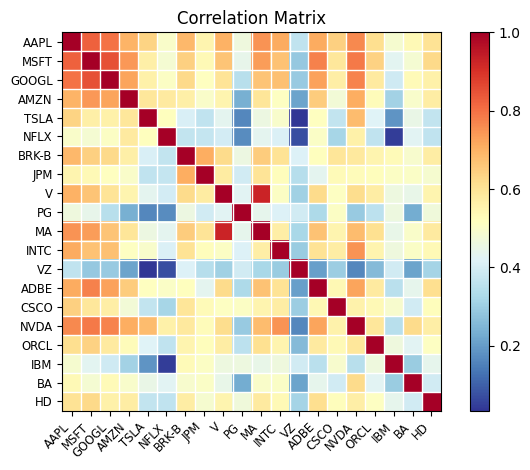

In [25]:
correlation = all_stock_returns.corr()
sm.graphics.plot_corr(correlation,xnames=list(correlation.columns))
None